In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.signal import convolve
from scipy import ndimage
from getBayer import getBayer, bayerGrid
% matplotlib inline
import io
import time
import copy
from numpy.lib.stride_tricks import as_strided

Gamma correction is a technique to logarithmically remap the pixel values of a digital image to range more readable to human eyes. 

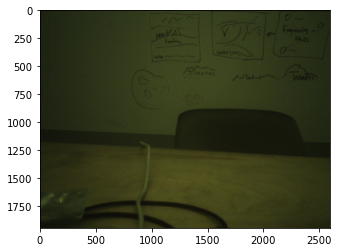

In [7]:
rgbIm = getBayer('wall2.pickle')
kernel = np.ones((3,3),dtype=np.uint8)
bayer_conv = np.zeros(bayerGrid.shape, dtype=np.uint8)
for i in range(3):
    bayer_conv[:,:,i] = convolve(bayerGrid[:,:,i], kernel, mode='same')
bayer_conv[:3,:3,0]  # peek at top left corner of r plane
rgb8_conv = np.zeros(rgbIm.shape, dtype=np.uint16)  # max sum here should be 1275 for 5 maxed green sencels
for i in range(3):
    rgb8_conv[:,:,i] = convolve(rgbIm[:,:,i].astype(np.uint16), kernel, mode='same')
    
res = rgb8_conv / bayer_conv
res = res.astype(np.uint8)
plt.imshow(res)
import copy
testIm = copy.deepcopy(res)

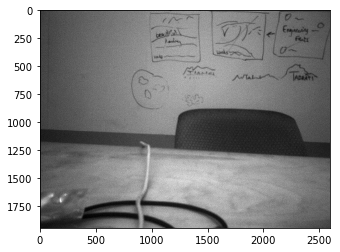

In [13]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
grayIm = rgb2gray(testIm)
plt.imshow(grayIm, cmap = 'gray')

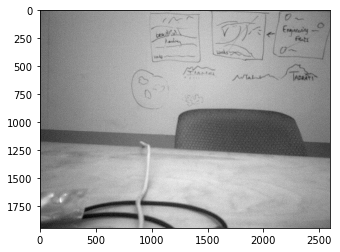

In [16]:
gamma = .3
grayGam= np.power(grayIm, gamma)
plt.imshow(grayGam, cmap = 'gray')